In [15]:
import pandas as pd
from pandas import merge
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.cluster.hierarchy import linkage,dendrogram
from scipy.cluster.hierarchy import fcluster
from scipy.spatial.distance import pdist

In [2]:
df_TC_LH_205_1 = pd.read_csv('D:/kimchaek file/csv_file/df_TC_LH_205_1.csv',sep = '\t')
df_TC_LH_205_2 = pd.read_csv('D:/kimchaek file/csv_file/df_TC_LH_205_2.csv',sep = '\t')
df_TC_LH_205_3 = pd.read_csv('D:/kimchaek file/csv_file/df_TC_LH_205_3.csv',sep = '\t')
df_TC_LH_208_2 = pd.read_csv('D:/kimchaek file/csv_file/df_TC_LH_208_2.csv',sep = '\t')
df_TC_LH_208_3 = pd.read_csv('D:/kimchaek file/csv_file/df_TC_LH_208_3.csv',sep = '\t')
df_TC_LH_210_1 = pd.read_csv('D:/kimchaek file/csv_file/df_TC_LH_210_1.csv',sep = '\t')
df_TC_LH_210_2 = pd.read_csv('D:/kimchaek file/csv_file/df_TC_LH_210_2.csv',sep = '\t')
df_TC_LH_211_2 = pd.read_csv('D:/kimchaek file/csv_file/df_TC_LH_211_2.csv',sep = '\t')

In [25]:
df_TC_LH_205_2.head()

weld_time  current  voltage  weld_point   robot_name  layer
0        300     9597     1776           1  TC_LH_205_2      2
1        300     9588     1925           2  TC_LH_205_2      2
2        300     9588     1891           3  TC_LH_205_2      2
3        300     9589     1937           4  TC_LH_205_2      2
4        280     7619     1819           5  TC_LH_205_2      3

In [26]:
df_TC_LH_205_21 = df_TC_LH_205_2[['weld_time','current','voltage','weld_point','layer']]
df_TC_LH_205_21.head()

weld_time  current  voltage  weld_point  layer
0        300     9597     1776           1      2
1        300     9588     1925           2      2
2        300     9588     1891           3      2
3        300     9589     1937           4      2
4        280     7619     1819           5      3

In [27]:
df_TC_LH_205_21['layer'].unique()

array([2, 3], dtype=int64)

In [28]:
X = df_TC_LH_205_21.T.values

In [29]:
Y = pdist(X)

In [30]:
mergings = linkage(Y,method='ward')

In [31]:
mergings

array([[3.00000000e+00, 4.00000000e+00, 3.44324861e+03, 2.00000000e+00],
       [0.00000000e+00, 5.00000000e+00, 9.98887738e+04, 3.00000000e+00],
       [2.00000000e+00, 6.00000000e+00, 6.45433288e+05, 4.00000000e+00],
       [1.00000000e+00, 7.00000000e+00, 3.30149579e+06, 5.00000000e+00]])

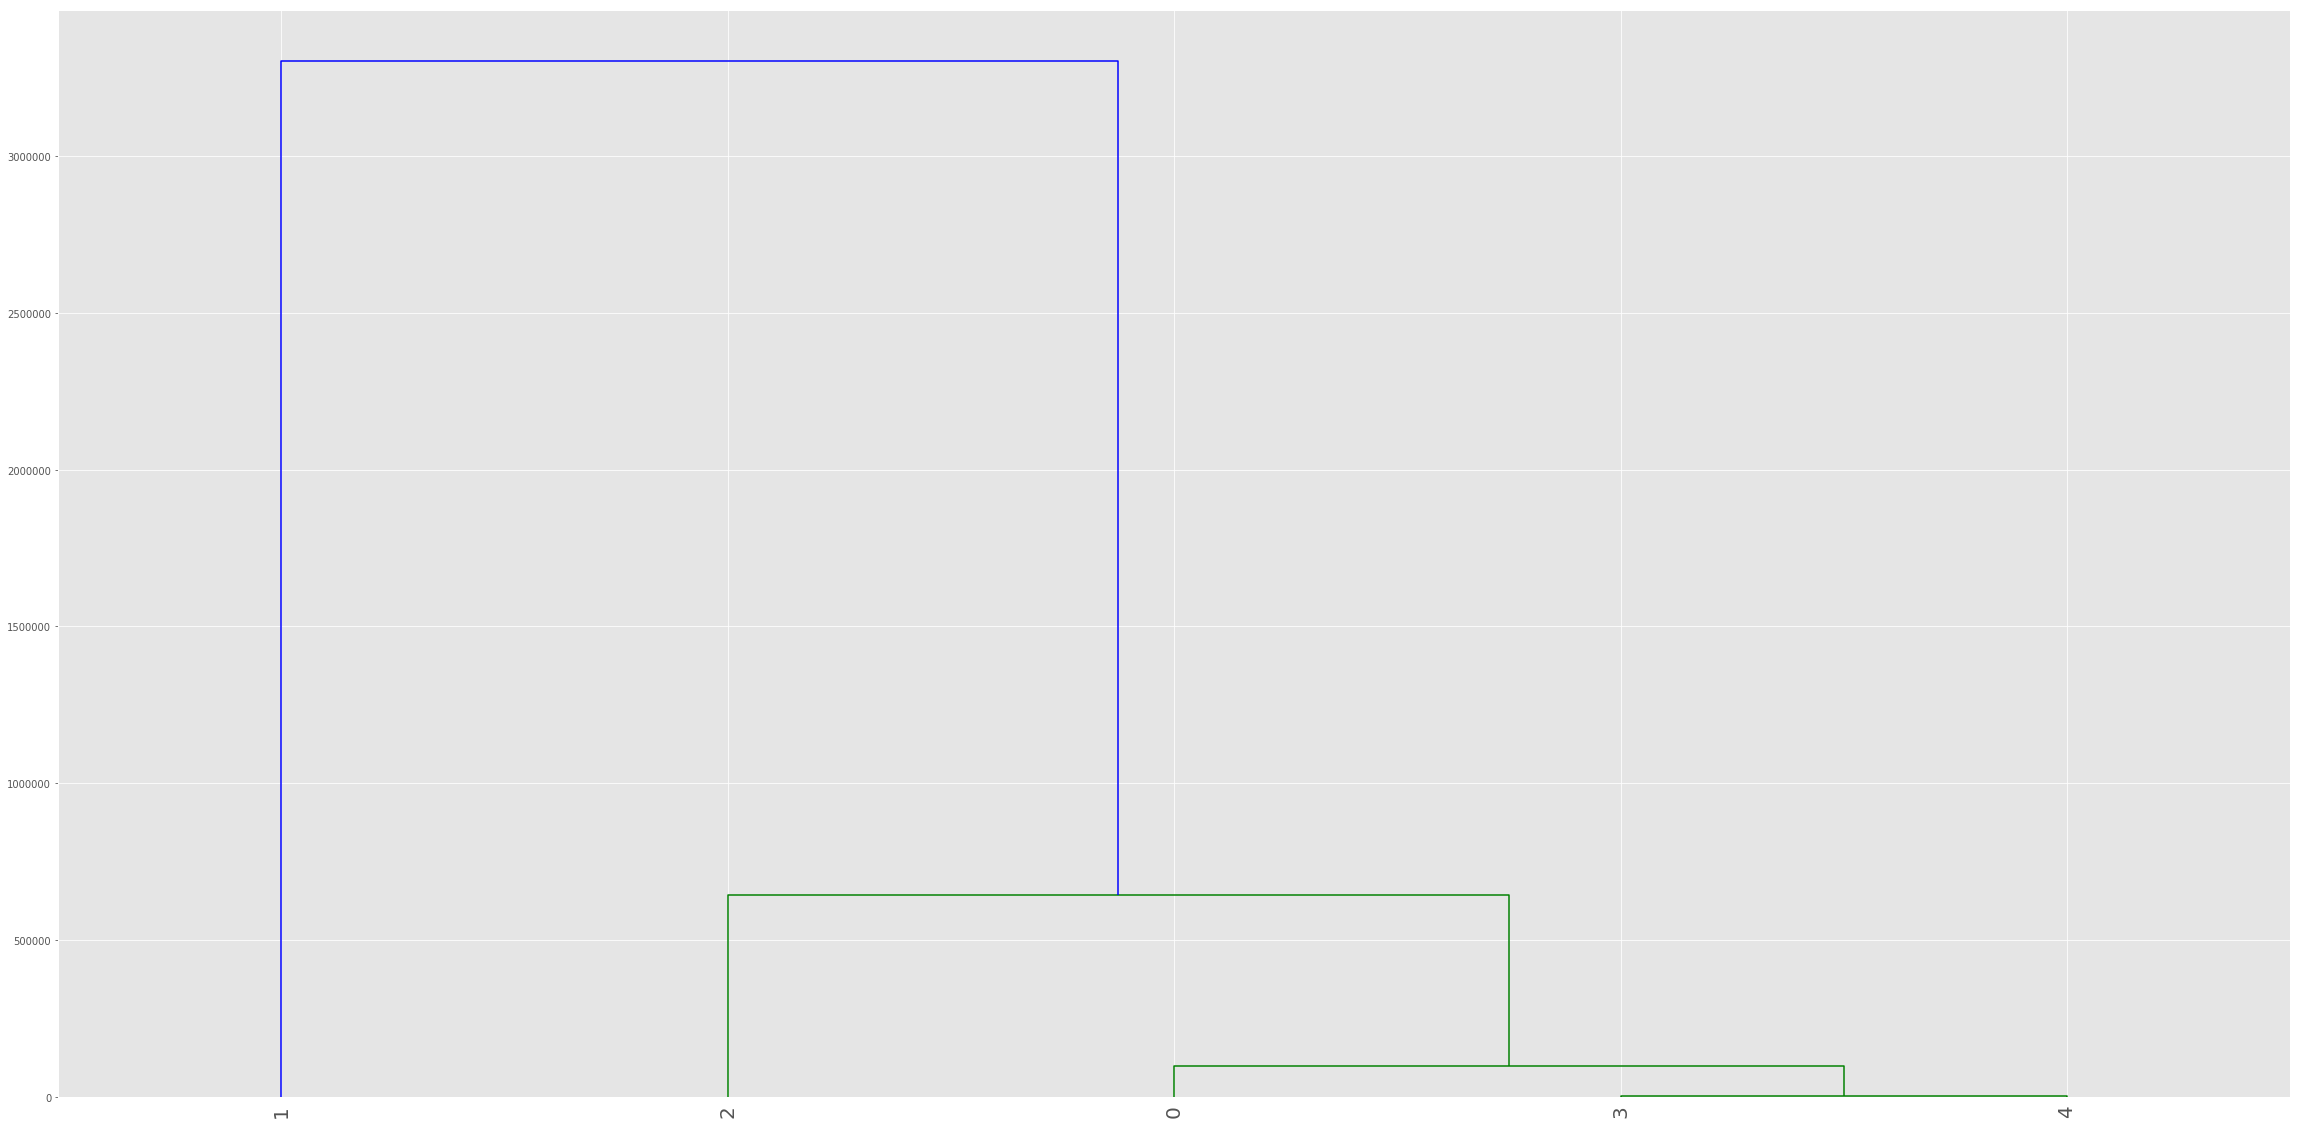

In [32]:
plt.figure(figsize=(40,20))
dendrogram(mergings,leaf_rotation=90,leaf_font_size=20)
plt.show()

# dendrogram(mergings,
#            labels = df_TC_LH_205_11.as_matrix(columns=['layer']),
#            leaf_rotation=90,
#            leaf_font_size=20)
# plt.show()

In [23]:
y_predict = fcluster(mergings,3,criterion='distance')
predict = pd.DataFrame(y_predict, columns=['predict'])
ct = pd.crosstab(predict['predict'],df_TC_LH_205_11['current'])
print(ct)

current  7430  7437  7669  7745  8019
predict                              
1           0     0     0     0     1
2           0     0     0     1     0
3           1     0     0     0     0
4           0     0     1     0     0
5           0     1     0     0     0


In [24]:
predict

predict
0        3
1        5
2        4
3        1
4        2